### Quick Project to Display Class Distribution

#### Import Necessary Libraries

In [12]:
import os, sys, glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

#### Ingest & Preprocess Training Dataset

In [13]:
train_files_list = glob.glob("/Users/briandunn/Desktop/Image Classification Comparison/data/Training/*/*.jpg")

train_df = pd.Series(train_files_list, name="file_name")

train_df = train_df.apply(lambda x: x.split("/")[-2])

train_df

0              no_tumor
1              no_tumor
2              no_tumor
3              no_tumor
4              no_tumor
             ...       
2865    pituitary_tumor
2866    pituitary_tumor
2867    pituitary_tumor
2868    pituitary_tumor
2869    pituitary_tumor
Name: file_name, Length: 2870, dtype: object

#### Clean Up Class String Names

In [18]:
cleaner_labels = {"pituitary_tumor": "Pituitary Tumor", 
                  "glioma_tumor": "Glioma Tumor", 
                  "meningioma_tumor": "Meningioma Tumor", 
                  "no_tumor": "No Tumor"}

train_df = train_df.replace(cleaner_labels)

train_df

0              No Tumor
1              No Tumor
2              No Tumor
3              No Tumor
4              No Tumor
             ...       
2865    Pituitary Tumor
2866    Pituitary Tumor
2867    Pituitary Tumor
2868    Pituitary Tumor
2869    Pituitary Tumor
Name: file_name, Length: 2870, dtype: object

#### Define Function to Create Bar Plot

In [19]:
def barplot_visual(feature_to_visualize: pd.Series,
                   plot_title: str,
                   x_label: str,
                   y_label: str = "# of Samples",
                   rotation: np.int8 = 0,
                   annotation: np.bool_ = True
                   ):
    """
    This function returns a histogram for a feature.
    
    Inputs: 
    - feature_to_visualize: Feature to plot in the form 
    of pandas Series.
    - plot_title: The title of the plot/visual.
    - x_label: The string label value for the x label.
    - y_label: The string label value for the y label.
    - rotation: The integer value of the rotation of 
        x-tick values
    - 
    
    Output:
    - A Bar Plot.
    """
    
    assert type(feature_to_visualize) == pd.Series, \
        "Make sure the dataset input type is a Pandas Series."
    assert type(plot_title) != 'str', \
        "The title value must be a string value."
    assert type(x_label) !=  'str', \
        "The x label value must be a string value."
    assert type(y_label) != 'str', \
        "The y label value must be a string value."
    assert type(rotation) != np.int8, \
        "The rotation value must be an integer value."
    
    ax = feature_to_visualize.value_counts().plot.bar( 
                                                      figsize=(12,8),
                                                      rot=rotation, 
                                                      legend=False,
                                                      color=["lightgreen", 
                                                             "blue", 
                                                             "brown", 
                                                             "lightblue",
                                                             "tan", 
                                                             "yellow", 
                                                             "orange",
                                                             "green", 
                                                             "red",
                                                             "purple"]
                                                      )
    
    if annotation:
        ax.bar_label(ax.containers[0])
    
    plt.suptitle('')
    plt.title(plot_title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    
    plt.show()

#### Class Distribution (Training Dataset)

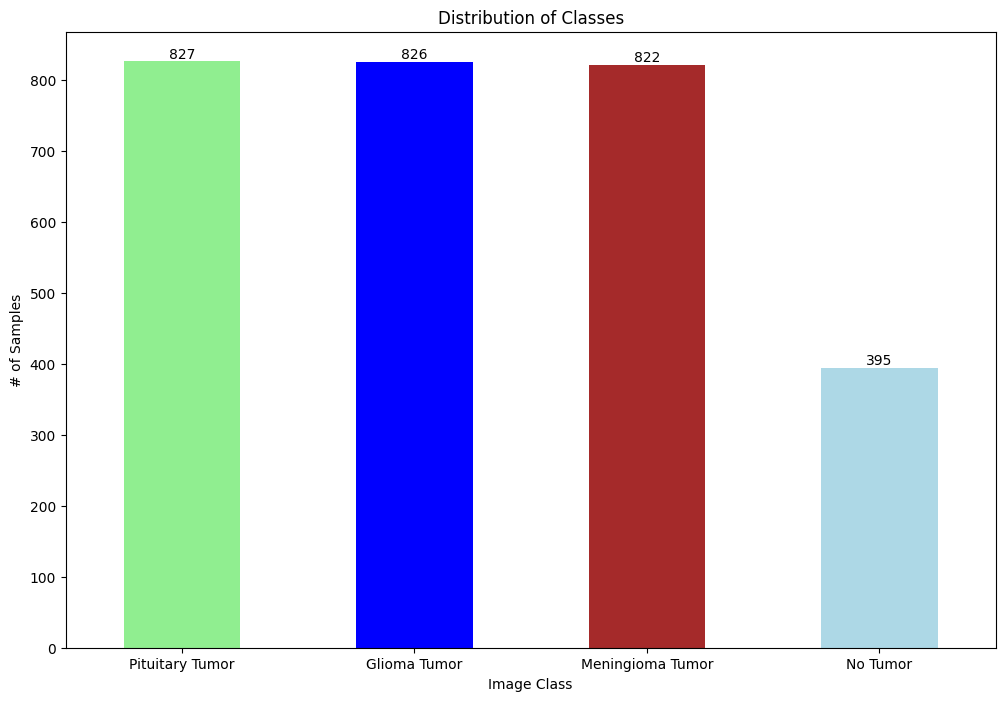

In [20]:
label_distribution = train_df

barplot_visual(label_distribution,
               "Distribution of Classes",
               "Image Class",
               "# of Samples")

#### Ingest & Preprocess Testing Dataset

In [21]:
test_files_list = glob.glob("/Users/briandunn/Desktop/Image Classification Comparison/data/Testing/*/*.jpg")

test_df = pd.Series(test_files_list, name="file_name")

test_df = test_df.apply(lambda x: x.split("/")[-2])

#### Clean Up Testing Dataset String Names

In [22]:
test_df = test_df.replace(cleaner_labels)

test_df

0             No Tumor
1             No Tumor
2             No Tumor
3             No Tumor
4             No Tumor
            ...       
389    Pituitary Tumor
390    Pituitary Tumor
391    Pituitary Tumor
392    Pituitary Tumor
393    Pituitary Tumor
Name: file_name, Length: 394, dtype: object

#### Class Distribution (Testing Dataset)

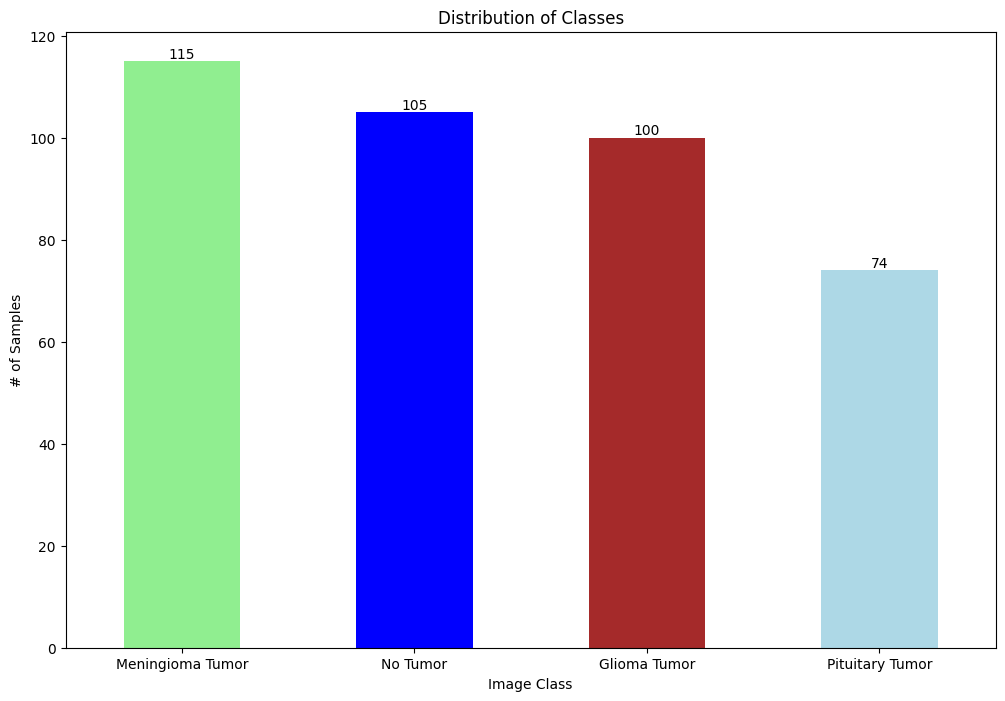

In [23]:
label_distribution = test_df

barplot_visual(label_distribution,
               "Distribution of Classes",
               "Image Class",
               "# of Samples")